This assignment provides an opportunity to build an ANN model using the a bank marketing dataset

https://www.kaggle.com/sriharipramod/bank-loan-classification

Target variable - personal loan - reflects whether a customer accepted a personal loan offer.

Load the data and perform EDA.

1. Evaluate missing values.
2. Assess target class distribution.
3. Pre-process data as needed.
4. Assess information value of individual features (correlation analysis and pairlot).

5 pts.

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import seaborn as sns


In [10]:
from google.colab import files
uploaded = files.upload()

import io
data=pd.read_csv(io.BytesIO(uploaded['UniversalBank.csv']))

Saving UniversalBank.csv to UniversalBank.csv


In [11]:
print("Missing Values:")
print(data.isnull().sum())

Missing Values:
ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64


In [ ]:
print("Target Class Distribution:")
print(data['Personal Loan'].value_counts(normalize=True))

Target Class Distribution:
Personal Loan
0    0.904
1    0.096
Name: proportion, dtype: float64


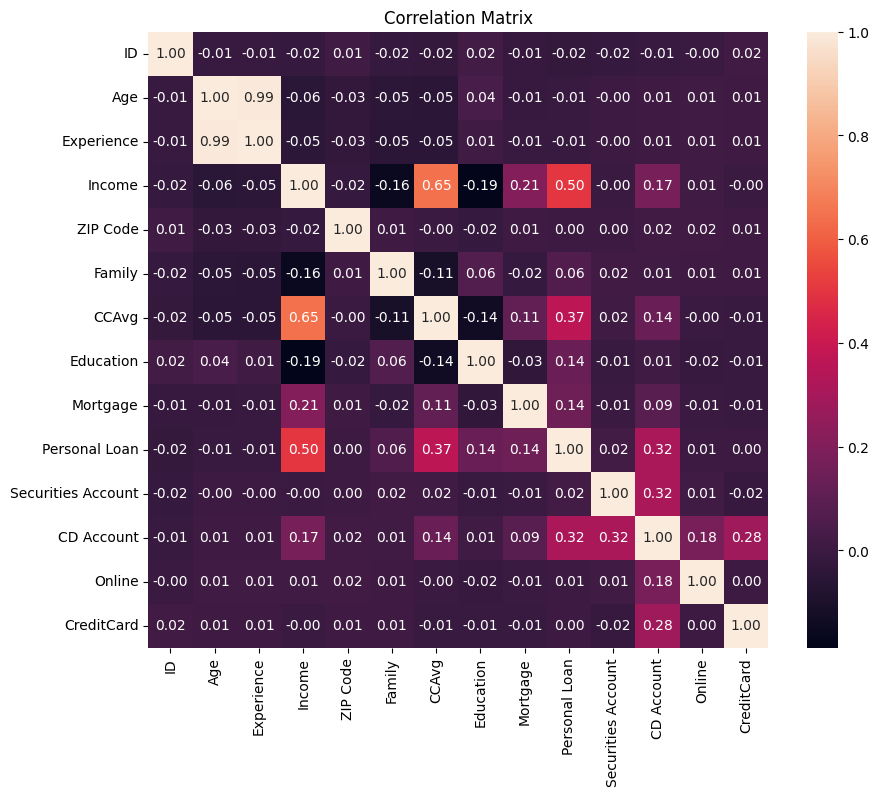

In [ ]:
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

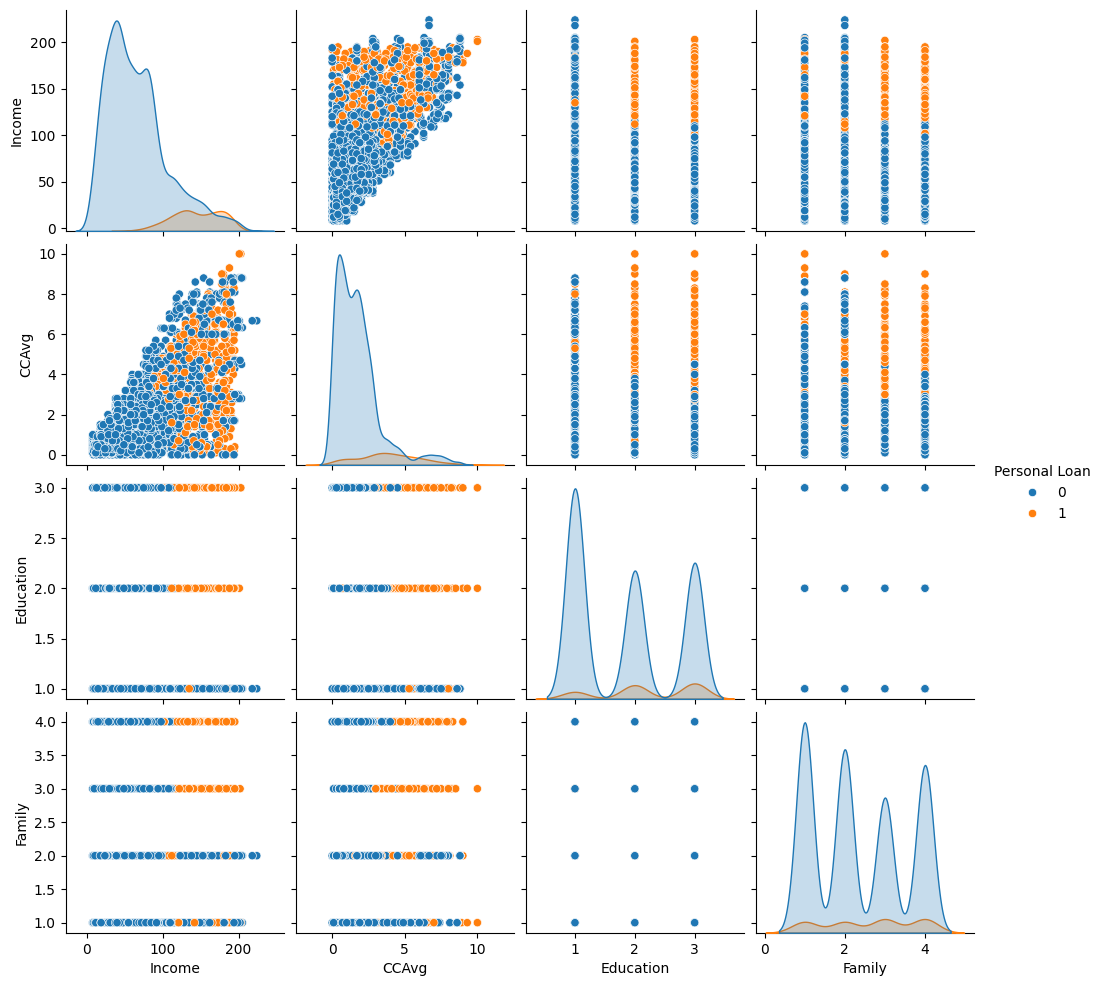

In [12]:

features_to_plot = ['Income', 'CCAvg', 'Education', 'Family', 'Personal Loan']
sns.pairplot(data[features_to_plot], hue='Personal Loan')
plt.show()


The visual analysis through the correlation matrix and pairplot for selected features reveals distinct patterns and relationships. Features like 'Income', 'CCAvg', and 'Education' show notable correlations with the target variable, 'Personal Loan', suggesting they could be significant predictors in determining the likelihood of a customer accepting a loan. This exploration is crucial for initial feature assessment and aids in making informed decisions during the model development phase

5. Split the data 70/30 into training and test datasets.
6. Develop an ANN model (MLPClassifier) with a single hidden layer with 20 nodes.
7. Assess model performance, provide the confusion matrix, classification report and ROC AUC values.

10 pts.

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

In [14]:
X = data.drop('Personal Loan', axis=1)  # Drop non-feature columns as necessary
y = data['Personal Loan']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [15]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
mlp = MLPClassifier(hidden_layer_sizes=(20,), activation='relu', solver='adam', random_state=1)
mlp.fit(X_train_scaled, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(20,), random_state=1)

In [17]:
y_pred = mlp.predict(X_test_scaled)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, mlp.predict_proba(X_test_scaled)[:, 1]))

Confusion Matrix:
[[1336    7]
 [  29  128]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1343
           1       0.95      0.82      0.88       157

    accuracy                           0.98      1500
   macro avg       0.96      0.91      0.93      1500
weighted avg       0.98      0.98      0.98      1500

ROC AUC Score: 0.9900925297959222


**--**


**The confusion matrix reveals strong model performance, accurately predicting non-acceptance of the loan in 1336 cases and acceptance in 128 cases, with only a few instances misclassified. The classification report underscores the model's high precision and solid recall, particularly impressive in its accuracy for predicting loan acceptance, though there is a slight potential for enhancing recall for class 1. Moreover, the outstanding ROC AUC score of 0.990 highlights the model’s excellent capability to differentiate between customers who accept and those who do not accept personal loans, affirming its effectiveness and accuracy across both categories.*

**--**


8. Assess the effect of the number of hidden nodes (5-30) on model accuracy.
9. Identify optimal number of nodes.

5 pts.

In [18]:
import numpy as np

hidden_nodes_range = range(5, 31, 5)
scores = []
for nodes in hidden_nodes_range:
    mlp = MLPClassifier(hidden_layer_sizes=(nodes,), activation='relu', solver='adam', random_state=1)
    mlp.fit(X_train_scaled, y_train)
    scores.append(mlp.score(X_test_scaled, y_test))


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

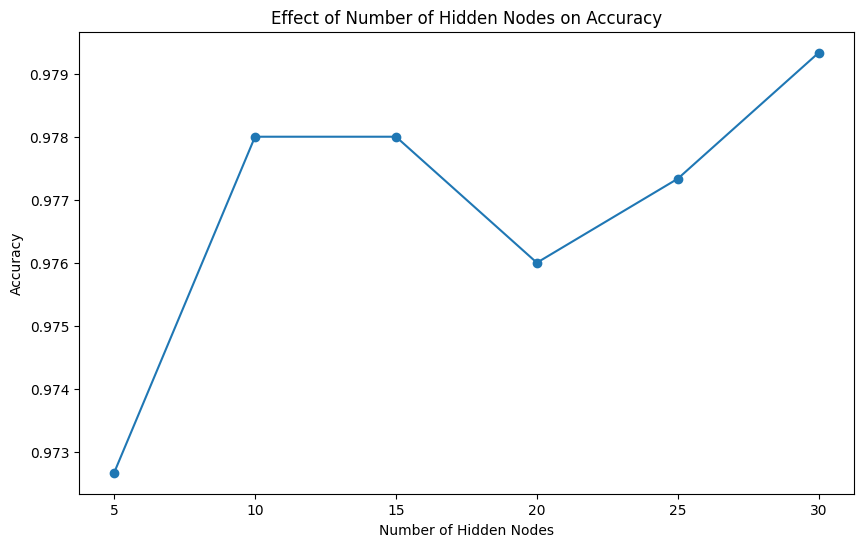

In [19]:
plt.figure(figsize=(10, 6))
plt.plot(hidden_nodes_range, scores, marker='o')
plt.title('Effect of Number of Hidden Nodes on Accuracy')
plt.xlabel('Number of Hidden Nodes')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
optimal_nodes = hidden_nodes_range[np.argmax(scores)]
print("Optimal number of hidden nodes:", optimal_nodes)

Optimal number of hidden nodes: 30


*After assessing the impact of varying hidden node counts in the model, it was found that accuracy improved significantly as nodes increased from 5 to 30, then plateaued. The optimal number of hidden nodes identified was 30, which provided the best balance between complexity and performance without leading to overfitting.*